In [1]:
import pickle

from matplotlib import pyplot as plt

In [2]:
data_path = 'models/satori_training_histories.pickle'

object = None
with (open(data_path, "rb")) as f:
    object = pickle.load(f)

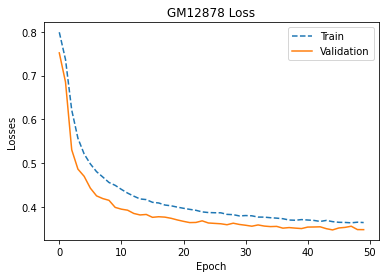

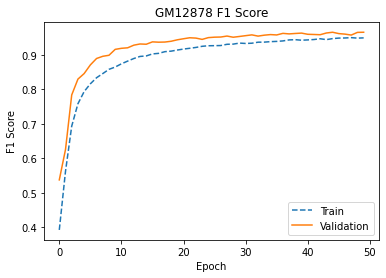

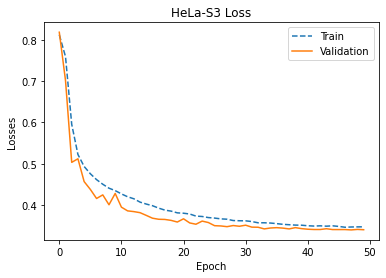

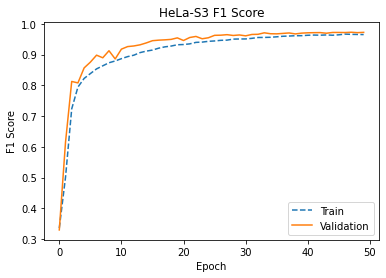

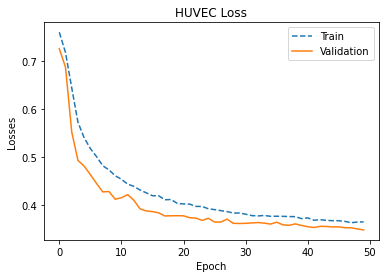

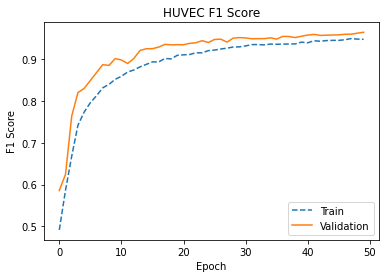

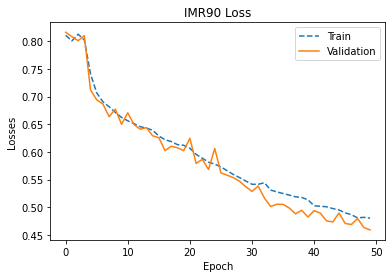

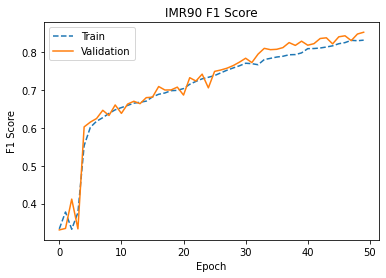

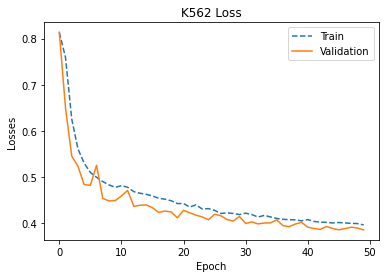

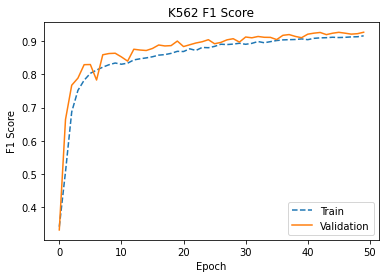

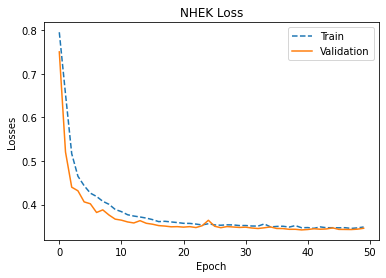

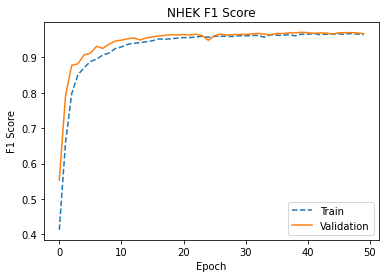

In [5]:
for cell_line, vals in object.items():
    tl = vals['train_losss']
    tf1 = vals['train_f1']
    vl = vals['val_losses']
    vf1 = vals['val_f1']

    plt.figure()
    plt.title(cell_line + " Loss")
    plt.plot(tl, "--", label="Train")
    plt.plot(vl, label="Validation")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Losses")
    plt.savefig("models/"+cell_line + " Loss.png")

    plt.figure()
    plt.title(cell_line+ " F1 Score")
    plt.plot(tf1, "--", label="Train")
    plt.plot(vf1, label="Validation")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.savefig("models/"+cell_line + " F1 Score.png")

In [6]:
for cell_line, vals in object.items():
    tl = vals['train_losss']
    tf1 = vals['train_f1']
    vl = vals['val_losses']
    vf1 = vals['val_f1']

    print(cell_line, max(vf1))

GM12878 0.9651392359906381
HeLa-S3 0.9728320765206253
HUVEC 0.9652700240278319
IMR90 0.8527100023461789
K562 0.9268859409638074
NHEK 0.9710970196042412


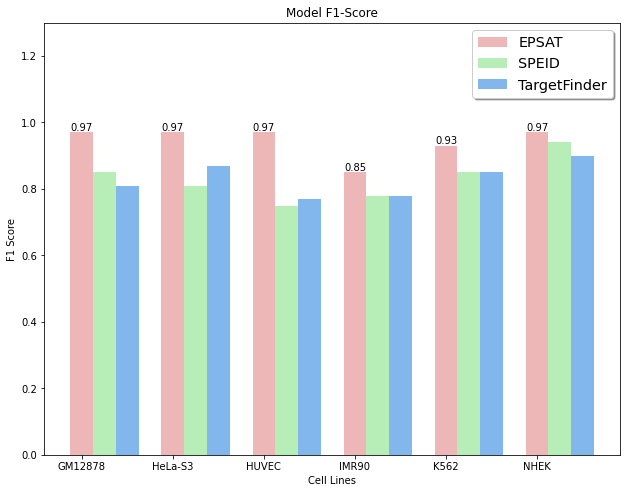

In [44]:
import numpy as np
#
# plt.figure(figsize=(18,8))
# X = np.arange(0, 24, 4)

tf_f1 = [0.81, 0.87, 0.77, 0.78, 0.85, 0.90]
speid_f1 = [0.85, 0.81 ,0.75 ,0.78 ,0.85, 0.94]
epsat_f1 = []
x_ticks = []

# for each cell lines, make one graph with 4 metrics
for cell_line, vals in object.items():
    x_ticks.append(cell_line)
    vf1 = round(max(vals['val_f1']),2)
    epsat_f1.append(vf1)

X = np.arange(6)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, epsat_f1, color = (0.9, 0.6, 0.6, 0.7), width = 0.25, label='EPSAT')
ax.bar(X + 0.25, speid_f1, color = (0.6, 0.9, 0.6, 0.7), width = 0.25, label='SPEID')
ax.bar(X + 0.50, tf_f1, color = (0.3, 0.6, 0.9, 0.7), width = 0.25, label='TargetFinder')

ax.bar_label(ax.containers[0], label_type='edge')

ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.ylabel("F1 Score")
plt.xlabel("Cell Lines")
plt.ylim(0, 1.3)
plt.xticks(np.arange(len(x_ticks)), x_ticks)
plt.title("Model F1-Score")
plt.show()


In [45]:
!pip install torchsummary

You should consider upgrading via the 'C:\Users\Lab-User\PycharmProjects\ML4FGsatori\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from torchsummary import summary
summary(your_model, input_size=(4, ))